In [2]:
# 2. მონაცემთა ბაზის შემოტანა და კავშირი
import sqlite3
import matplotlib.pyplot as plt

# დაკავშირება ბაზასთან.
conn = sqlite3.connect('books.db')
cursor = conn.cursor()

print("კავშირი books.db მონაცემთა ბაზასთან წარმატებით დამყარდა.")

კავშირი books.db მონაცემთა ბაზასთან წარმატებით დამყარდა.


In [4]:
# 3. მონაცემების წაკითხვა WHERE ოპერაციით
author_name_input = input("შეიყვანე ავტორის სახელი ან მისი ნაწილი (მაგ. Rowling): ")

# შეცვლილი SQL მოთხოვნა: field2 (title), field3 (authors), field4 (average_rating)
cursor.execute("SELECT field2, field3, field4 FROM books WHERE field3 LIKE ? AND field1 != 'bookID'", ('%' + author_name_input + '%',))
results = cursor.fetchall()

print(f"წიგნები ავტორის მიერ, რომელიც შეიცავს '{author_name_input}'-ს")
if results:
    for row in results:
        print(f"სათაური: {row[0]}, ავტორი: {row[1]}, რეიტინგი: {row[2]}")
else:
    print(f"მონაცემები ვერ მოიძებნა ავტორისთვის '{author_name_input}'.")

# ეს ბრძანება იღებს ყველა იმ წიგნის სათაურს , ავტორს და საშუალო რეიტინგს ,
# რომელთა ავტორის სახელში არის მომხმარებლის მიერ შეყვანილი სიტყვა.
# fetchall() ფუნქცია აბრუნებს ყველა მოძიებულ ჩანაწერს სიაში.
# field1 != 'bookID' დამატებულია იმისთვის, რომ გამოვრიცხოთ სათაურის რიგი.

შეიყვანე ავტორის სახელი ან მისი ნაწილი (მაგ. Rowling):  King


წიგნები ავტორის მიერ, რომელიც შეიცავს 'King'-ს
სათაური: The Illustrated A Brief History of Time, ავტორი: Stephen Hawking, რეიტინგი: 4.17
სათაური: A Briefer History of Time, ავტორი: Stephen Hawking/Leonard Mlodinow, რეიტინგი: 4.22
სათაური: The Universe in a Nutshell, ავტორი: Stephen Hawking, რეიტინგი: 4.15
სათაური: God Created the Integers: The Mathematical Breakthroughs That Changed History, ავტორი: Stephen Hawking, რეიტინგი: 4.07
სათაური: Stephen Hawking's Universe: The Cosmos Explained, ავტორი: David Filkin/Stephen Hawking, რეიტინგი: 4.29
სათაური: The Future of Spacetime, ავტორი: Stephen Hawking/Kip S. Thorne/Igor Novikov/Timothy Ferris/Alan Lightman/Richard     Price, რეიტინგი: 3.94
სათაური: The Nature of Space and Time, ავტორი: Stephen Hawking/Roger Penrose, რეიტინგი: 4.09
სათაური: The Physics of Star Trek, ავტორი: Lawrence M. Krauss/Stephen Hawking, რეიტინგი: 3.83
სათაური: Primal Heat (Includes: Breeds  #8.5; Devlin Dynasty  #1; Moon Lust  #1), ავტორი: Lora Leigh/Sherri L. King/Lo

In [5]:
# 4. ახალი ჩანაწერის დამატება (user input-ით)
print("ახალი წიგნის დამატება")
book_id_new = input("შეიყვანე წიგნის ID (უნიკალური, მაგ. 99999): ")
title_new = input("შეიყვანე წიგნის სათაური: ")
authors_new = input("შეიყვანე ავტორი (ან ავტორები, მძიმით გამოყოფილი): ")
num_pages_new = input("შეიყვანე გვერდების რაოდენობა: ")
language_code_new = input("შეიყვანე ენის კოდი (მაგ. eng, geo): ")
publisher_new = input("შეიყვანე გამომცემელი: ")

try:
    cursor.execute("""
        INSERT INTO books (field1, field2, field3, field8, field7, field12)
        VALUES (?, ?, ?, ?, ?, ?)
    """, (book_id_new, title_new, authors_new, num_pages_new, language_code_new, publisher_new))
    conn.commit()
    print(f"წიგნი '{title_new}' ID: {book_id_new} წარმატებით დაემატა.")
except ValueError as msg:
    print(f"შეცდომა ჩანაწერის დამატებისას: {e}. შესაძლოა, ID უკვე არსებობს ან სხვა შეზღუდვა დაირღვა.")
except Exception as m:
    print(f"მოხდა შეცდომა: {e}")

ახალი წიგნის დამატება


შეიყვანე წიგნის ID (უნიკალური, მაგ. 99999):  6539
შეიყვანე წიგნის სათაური:  დიდოსტატის მარჯვენა
შეიყვანე ავტორი (ან ავტორები, მძიმით გამოყოფილი):  კონსტანტინე გამსახურდია
შეიყვანე გვერდების რაოდენობა:  547
შეიყვანე ენის კოდი (მაგ. eng, geo):  geo
შეიყვანე გამომცემელი:  პალიტრა L


წიგნი 'დიდოსტატის მარჯვენა' ID: 6539 წარმატებით დაემატა.


In [6]:
# 5. ჩანაწერის განახლება (user input-ით)
print("წიგნის სათაურის განახლება")
update_book_id = input("შეიყვანე ID წიგნის გასანახლებლად: ")
new_title_for_update = input("შეიყვანე ახალი სათაური ამ ID-ისთვის: ")

cursor.execute("UPDATE books SET field2 = ? WHERE field1 = ?", (new_title_for_update, update_book_id))
conn.commit()

if cursor.rowcount > 0:
    print(f"წიგნი ID '{update_book_id}' წარმატებით განახლდა ახალი სათაურით: '{new_title_for_update}'.")
else:
    print(f"წიგნი ID '{update_book_id}' ვერ მოიძებნა ან არ განახლდა.")

წიგნის სათაურის განახლება


შეიყვანე ID წიგნის გასანახლებლად:  2471
შეიყვანე ახალი სათაური ამ ID-ისთვის:  ცისფერი მთები


წიგნი ID '2471' ვერ მოიძებნა ან არ განახლდა.


In [7]:
# 6. ჩანაწერის წაშლა (user input-ით)
print("წიგნის წაშლა")
delete_book_id = input("შეიყვანე ID წიგნის წასაშლელად: ")

cursor.execute("DELETE FROM books WHERE field1 = ?", (delete_book_id,))
conn.commit()

if cursor.rowcount > 0:
    print(f"წიგნი ID '{delete_book_id}' წარმატებით წაიშალა.")
else:
    print(f"წიგნი ID '{delete_book_id}' ვერ მოიძებნა ან არ წაიშალა.")

წიგნის წაშლა


შეიყვანე ID წიგნის წასაშლელად:  7562


წიგნი ID '7562' ვერ მოიძებნა ან არ წაიშალა.


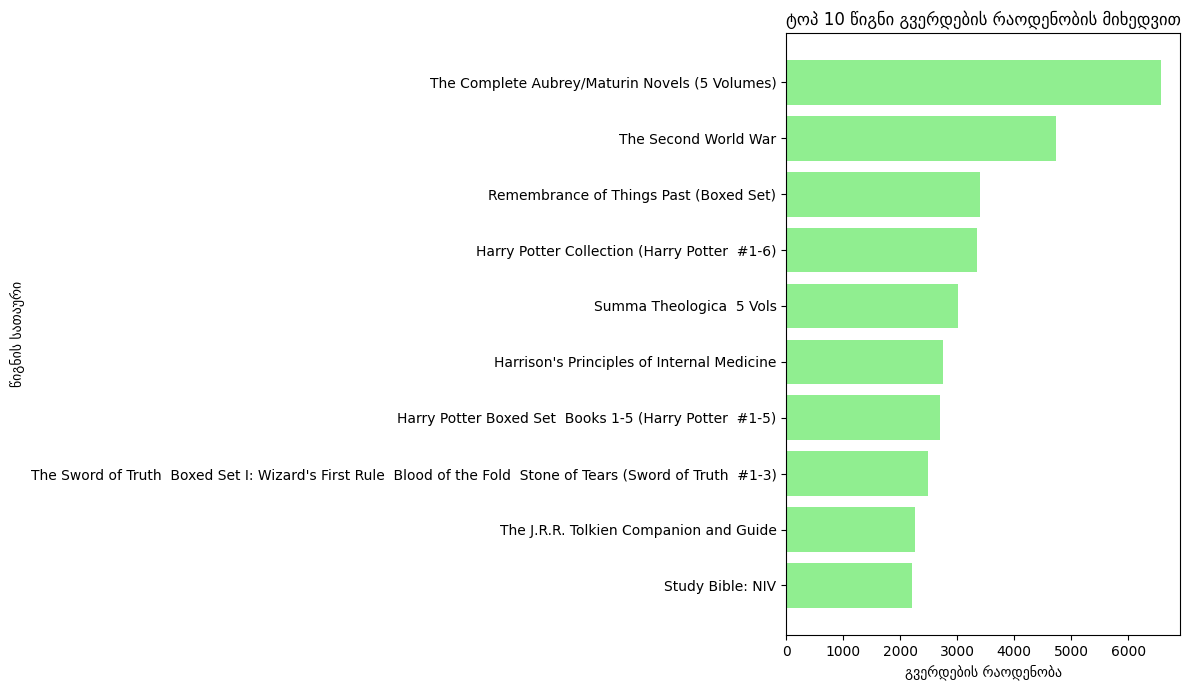

დიაგრამა 1: ტოპ 10 წიგნი გვერდების რაოდენობის მიხედვიტ
ეს ჰორიზონტალური სვეტოვანი დიაგრამა აჩვენებს 10 წიგნს, რომლებსაც ყველაზე მეტი გვერდი აქვს. ამ დიაგრამით ვადგენთ, რომელი წიგნებია ყველაზე ვრცელი მონაცემთა ბაზაში.


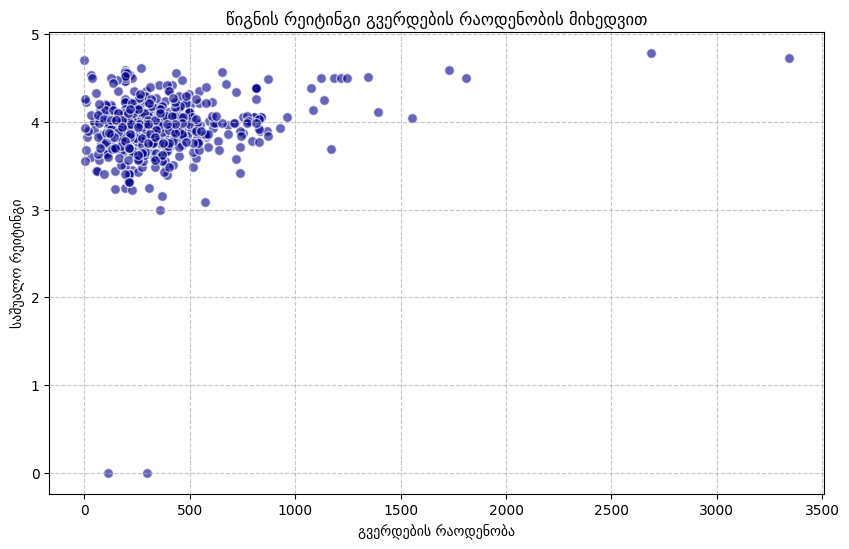

დიაგრამა 2: წიგნის რეიტინგი გვერდების რაოდენობის მიხედვით
ეს წერტილოვანი დიაგრამა აჩვენებს კავშირს წიგნების გვერდების რაოდენობასა და მათ საშუალო რეიტინგს შორის. თვალსაჩინოა, არის თუ არა კავშირი წიგნის სიგრძესა და მის პოპულარობას შორის.


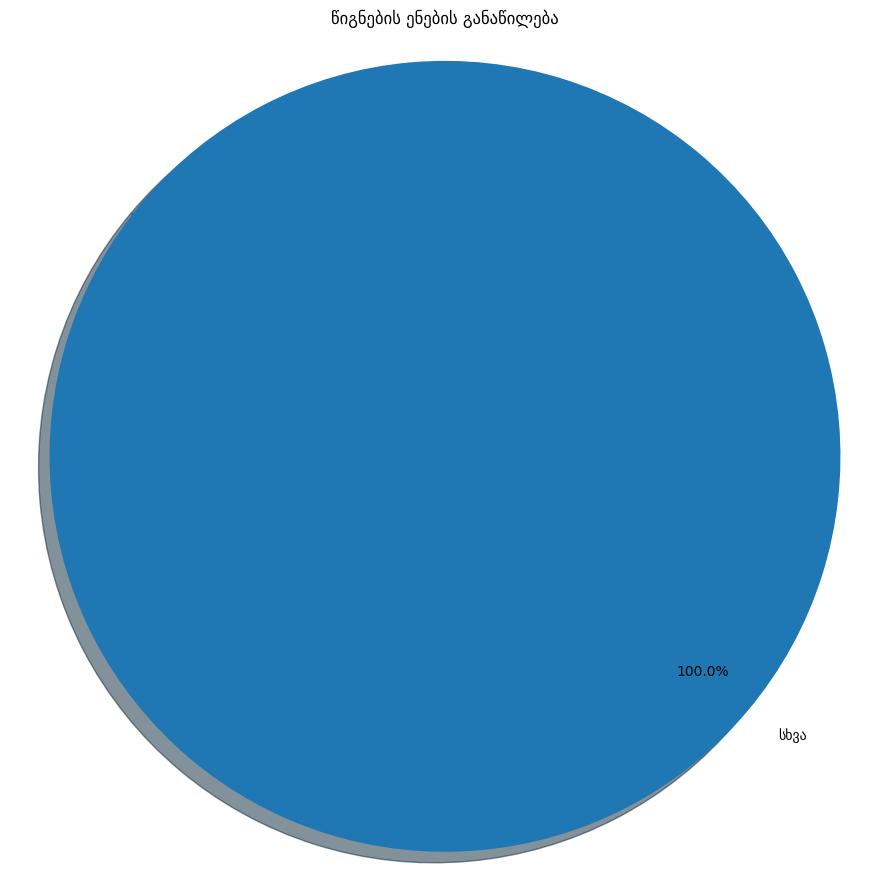

დიაგრამა 3: წიგნების ენების განაწილება
ეს წრიული დიაგრამა გვიჩვენებს წიგნების განაწილებას ენების მიხედვით. თვალსაჩინოა, რომელი ენის წიგნებია ყველაზე მეტი მონაცემთა ბაზაში. მცირე წილის მქონე ენები თავმოყრილია 'სხვა' კატეგორიაში.


In [8]:
# 7. მონაცემების ვიზუალიზაცია — 3 დიაგრამა (matplotlib)

# 1) ჰორიზონტალური სვეტოვანი დიაგრამა — ტოპ 10 წიგნი გვერდების რაოდენობის მიხედვით
# ვიყენებთ field2 (title) და field8 (num_pages)
cursor.execute("""
    SELECT field2, CAST(field8 AS INTEGER)
    FROM books
    WHERE field8 IS NOT NULL AND field1 != 'bookID'
    ORDER BY CAST(field8 AS INTEGER) DESC
    LIMIT 10
""")
top_books_by_pages = cursor.fetchall()

if top_books_by_pages:
    titles = [book[0] for book in top_books_by_pages]
    pages = [book[1] for book in top_books_by_pages]

    plt.figure(figsize=(12, 7))
    plt.barh(titles, pages, color='lightgreen')
    plt.xlabel('გვერდების რაოდენობა')
    plt.ylabel('წიგნის სათაური')
    plt.title('ტოპ 10 წიგნი გვერდების რაოდენობის მიხედვით')
    plt.gca().invert_yaxis() # უმაღლესი მნიშვნელობა ზემოთ
    plt.tight_layout() # დიაგრამის ელემენტების გაწყობა
    plt.show()

    print("დიაგრამა 1: ტოპ 10 წიგნი გვერდების რაოდენობის მიხედვიტ")
    print("ეს ჰორიზონტალური სვეტოვანი დიაგრამა აჩვენებს 10 წიგნს, რომლებსაც ყველაზე მეტი გვერდი აქვს. ამ დიაგრამით ვადგენთ, რომელი წიგნებია ყველაზე ვრცელი მონაცემთა ბაზაში.")
else:
    print("მონაცემები გვერდების რაოდენობის მიხედვით ვერ მოიძებნა დიაგრამისთვის.")

# 2) წერტილოვანი დიაგრამა — რეიტინგი vs გვერდები
# ვიყენებთ field4 (average_rating) და field8 (num_pages)
cursor.execute("""
    SELECT CAST(field4 AS FLOAT), CAST(field8 AS INTEGER)
    FROM books
    WHERE field4 IS NOT NULL AND field8 IS NOT NULL AND field1 != 'bookID'
    LIMIT 500
""") # ლიმიტი დავაყენე, თუ ძალიან ბევრი მონაცემი იქნება
rating_page_data = cursor.fetchall()

if rating_page_data:
    ratings = [row[0] for row in rating_page_data]
    pages = [row[1] for row in rating_page_data]

    plt.figure(figsize=(10, 6))
    plt.scatter(pages, ratings, alpha=0.6, color='darkblue', edgecolors='w', s=50) # s არის წერტილის ზომა
    plt.xlabel("გვერდების რაოდენობა")
    plt.ylabel("საშუალო რეიტინგი")
    plt.title("წიგნის რეიტინგი გვერდების რაოდენობის მიხედვით")
    plt.grid(True, linestyle='--', alpha=0.7) # ბადის დამატება
    plt.show()

    print("დიაგრამა 2: წიგნის რეიტინგი გვერდების რაოდენობის მიხედვით")
    print("ეს წერტილოვანი დიაგრამა აჩვენებს კავშირს წიგნების გვერდების რაოდენობასა და მათ საშუალო რეიტინგს შორის. თვალსაჩინოა, არის თუ არა კავშირი წიგნის სიგრძესა და მის პოპულარობას შორის.")
else:
    print("მონაცემები რეიტინგისა და გვერდების რაოდენობის მიხედვით ვერ მოიძებნა დიაგრამისთვის.")

# 3) წრიული დიაგრამა — წიგნების ენების განაწილება
# ვიყენებთ field7 (language_code)
cursor.execute("""
    SELECT field7, COUNT(*)
    FROM books
    WHERE field7 IS NOT NULL AND field1 != 'bookID'
    GROUP BY field7
    ORDER BY COUNT(*) DESC
""")
lang_data = cursor.fetchall()

if lang_data:
    languages = [row[0] for row in lang_data]
    counts = [row[1] for row in lang_data]

    # თუ ბევრი ენაა, დავაჯგუფოთ პატარები "სხვა" კატეგორიაში
    threshold = sum(counts) * 0.02 # მაგალითად, 2%-ზე ნაკლები იყოს "სხვა"
    major_languages = []
    major_counts = []
    other_count = 0

    for i in range(len(languages)):
        if counts[i] / sum(counts) > threshold: # შევცვალე შედარება პროცენტულად
            major_languages.append(languages[i])
            major_counts.append(counts[i])
        else:
            other_count += counts[i]

    if other_count > 0:
        major_languages.append("სხვა")
        major_counts.append(other_count)

    plt.figure(figsize=(9, 9))
    plt.pie(major_counts, labels=major_languages, autopct='%1.1f%%', startangle=140, pctdistance=0.85, shadow=True)
    plt.title("წიგნების ენების განაწილება")
    plt.axis('equal') # უზრუნველყოფს, რომ წრიული დიაგრამა იყოს წრე
    plt.tight_layout()
    plt.show()

    print("დიაგრამა 3: წიგნების ენების განაწილება")
    print("ეს წრიული დიაგრამა გვიჩვენებს წიგნების განაწილებას ენების მიხედვით. თვალსაჩინოა, რომელი ენის წიგნებია ყველაზე მეტი მონაცემთა ბაზაში. მცირე წილის მქონე ენები თავმოყრილია 'სხვა' კატეგორიაში.")
else:
    print("მონაცემები ენების განაწილების მიხედვით ვერ მოიძებნა დიაგრამისთვის.")


In [9]:
# 8. კავშირის გაწყვეტა
conn.close()
print("\nკავშირი მონაცემთა ბაზასთან გაწყვეტილია.")


კავშირი მონაცემთა ბაზასთან გაწყვეტილია.
